In [1]:
#imports
import numba
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
import os
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
from PIL import Image

import cv2

In [2]:
# load train and test dataset
def load_dataset(mydir, size=(256,256)):
    images = []
    for i in tqdm(os.listdir(mydir)):
        for file in os.listdir(mydir+"\\"+i):
            if os.path.isfile(mydir+"\\"+i+"\\"+file):
                #openimg + convert into numpy array + add to list
                #print("path : ", mydir+"\\"+i+"\\"+file)
                image = cv2.imread(mydir+"\\"+i+"\\"+file, )
                image = cv2.resize(image, size, interpolation=cv2.INTER_AREA)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = np.reshape(image, (256,256,3))
                images.append(image)
                

    #list of numpy array to numpy array
    images = np.asarray(images)
    return images

my_dir = "D:\\Unsupervised_DL\\archive\\simpsons_dataset"
images = load_dataset(my_dir, (256,256))
print("images shape : ", images.shape)

100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [01:08<00:00,  1.60s/it]


images shape :  (20933, 256, 256, 3)


In [3]:
# preprocess pixels
def preprocess_pixels(trainX):
    # convert from integers to floats
    trainX_norm = trainX.astype('float32')
    # normalize to range 0-1
    trainX_norm = trainX_norm / 255.0
    # return normalized images
    return trainX_norm

trainX = preprocess_pixels(images)
trainY = [] #vide pour le moment
print("trainX shape ", trainX.shape)

trainX shape  (20933, 256, 256, 3)


In [4]:
class myKmeans:
    def __init__(self, nb_centroids = 1, max_iter = 300, tol = 0.0001):
        self.nb_centroids = nb_centroids
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = []


    def fit(self, dataset, classes):
        #init of centroids
        get_ids = []
        while len(self.centroids) < self.nb_centroids:
            r = random.randint(0, len(dataset))
            if r in get_ids:
                continue
            get_ids.append(r)
            self.centroids.append(dataset[r])

        has_moved = True
        associate = [] 
        count = 0
        for iterate in range(self.max_iter):
            has_moved = False
            associate.clear()
            count += 1
            for element in dataset:
                val_closest = np.linalg.norm(element - self.centroids[0])
                id_closest = 0
                for i,centroid in enumerate(self.centroids):
                    val = np.linalg.norm(element - centroid)
                    if val <= val_closest:
                        val_closest = val
                        id_closest = i

                associate.append(id_closest)

            for id_centroid,centroid in enumerate(self.centroids):
                new_centroid = np.zeros(centroid.shape)
                count = 0
                for id_element,id_closest_centroid in enumerate(associate):
                    if id_centroid == id_closest_centroid:
                        count+=1
                        new_centroid += dataset[id_element]

                if count == 0:
                    self.centroids[id_centroid] = dataset[random.randint(0, len(dataset))]
                else:
                    new_centroid = new_centroid / count

                diff = np.linalg.norm(new_centroid - centroid)
                if diff > self.tol: 
                    has_moved = True

                self.centroids[id_centroid] = new_centroid 
            if has_moved == False:
                break

        print(f"###################\n# iter number {count} #\n###################")
        #self.plot(associate, classes)


    def simple_encode(self, X):
        val_closest = np.linalg.norm(X - self.centroids[0])
        id_closest = 0
        for i,centroid in tqdm(enumerate(self.centroids)):
            val = np.linalg.norm(X - centroid)
            if val <= val_closest:
                val_closest = val
                id_closest = i
        return id_closest

    def one_hot_encode(self,X):
        liste = [0]*self.nb_centroids
        liste[self.simple_encode(X)] = 1
        return liste

    def simple_decode(self, X_encode):
        return self.centroids[X_encode]

    def one_hot_decode(self, X_encode):
        return self.centroids(X_encore.index(1))

    def plot(self, associate, classes):
        class0 = [0]*self.nb_centroids
        class1 = [0]*self.nb_centroids
        class2 = [0]*self.nb_centroids
        class3 = [0]*self.nb_centroids
        class4 = [0]*self.nb_centroids
        class5 = [0]*self.nb_centroids
        class6 = [0]*self.nb_centroids
        class7 = [0]*self.nb_centroids
        class8 = [0]*self.nb_centroids
        class9 = [0]*self.nb_centroids
        x_list = []

        for centroid in range(self.nb_centroids):
            x_list.append(centroid + 1)
            for img_id,centroid_id in enumerate(associate):
                if centroid_id == centroid:
                    if np.where(classes[img_id] == 1.0)[0][0] == 0:
                        class0[centroid]+=1
                    elif np.where(classes[img_id] == 1.0)[0][0] == 1:
                        class1[centroid]+=1
                    elif np.where(classes[img_id] == 1.0)[0][0] == 2:
                        class2[centroid]+=1
                    elif np.where(classes[img_id] == 1.0)[0][0] == 3:
                        class3[centroid]+=1
                    elif np.where(classes[img_id] == 1.0)[0][0] == 4:
                        class4[centroid]+=1
                    elif np.where(classes[img_id] == 1.0)[0][0] == 5:
                        class5[centroid]+=1
                    elif np.where(classes[img_id] == 1.0)[0][0] == 6:
                        class6[centroid]+=1
                    elif np.where(classes[img_id] == 1.0)[0][0] == 7:
                        class7[centroid]+=1
                    elif np.where(classes[img_id] == 1.0)[0][0] == 8:
                        class8[centroid]+=1
                    else:
                        class9[centroid]+=1

        x = np.asarray(x_list)
        plt.figure(figsize=(20, 8))
        width = 0.09

        plt.bar(x-0.45, class1, width=0.09, color='blue', align='center',label="1")
        plt.bar(x-0.36, class2, width=0.09, color='orange', align='center',label="2")
        plt.bar(x-0.27, class3, width=0.09, color='green', align='center',label="3")
        plt.bar(x-0.18, class4, width=0.09, color='red', align='center',label="4")
        plt.bar(x-0.09, class5, width=0.09, color='purple', align='center',label="5")
        plt.bar(x, class6, width=0.09, color='brown', align='center',label="6")
        plt.bar(x+0.09, class7, width=0.09, color='pink', align='center',label="7")
        plt.bar(x+0.18, class8, width=0.09, color='grey', align='center',label="8")
        plt.bar(x+0.27, class9, width=0.09, color='olive', align='center',label="9")
        plt.bar(x+0.36, class0, width=0.09, color='cyan', align='center',label="0")

        plt.xlabel("id_centroid")
        plt.ylabel("number of data")
        plt.title("Number data per classes per centroids")

        plt.xticks(x + width/2, x)
        plt.legend()

        plt.show()


    def print_centroids_as_images(self):
        fig=plt.figure(figsize=(10, 10))
        columns = 10
        rows = int(self.nb_centroids / 10) + 1

        for id,i in enumerate(self.centroids):
            fig.add_subplot(rows, columns, id+1)       
            plt.imshow(testX[r].squeeze(2), cmap=plt.cm.binary)
            plt.imshow(i.squeeze(2), cmap=plt.cm.binary)
            plt.xlabel(id)

In [5]:
"""test1 = myKmeans(nb_centroids=2,max_iter=1000,tol=0.0001)
test2 = myKmeans(nb_centroids=4,max_iter=1000,tol=0.0001)
test3 = myKmeans(nb_centroids=6,max_iter=1000,tol=0.0001)
test4 = myKmeans(nb_centroids=8,max_iter=1000,tol=0.0001)
test5 = myKmeans(nb_centroids=10,max_iter=1000,tol=0.0001)
test6 = myKmeans(nb_centroids=15,max_iter=1000,tol=0.0001)
test7 = myKmeans(nb_centroids=20,max_iter=10000,tol=0.0001)
test8 = myKmeans(nb_centroids=25,max_iter=10000,tol=0.0001)
test9 = myKmeans(nb_centroids=30,max_iter=10000,tol=0.0001)
test10 = myKmeans(nb_centroids=35,max_iter=10000,tol=0.0001)
test11 = myKmeans(nb_centroids=40,max_iter=10000,tol=0.0001)"""
test12 = myKmeans(nb_centroids=43,max_iter=10000,tol=0.0001)
test13 = myKmeans(nb_centroids=45,max_iter=10000,tol=0.0001)
test14 = myKmeans(nb_centroids=50,max_iter=10000,tol=0.0001)

In [6]:
"""test1.fit(trainX,trainY)
test2.fit(trainX,trainY)
test3.fit(trainX,trainY)
test4.fit(trainX,trainY)
test5.fit(trainX,trainY)
test6.fit(trainX,trainY)
test7.fit(trainX,trainY)
test8.fit(trainX,trainY)
test9.fit(trainX,trainY)
test10.fit(trainX,trainY)
test11.fit(trainX,trainY)"""
test12.fit(trainX,trainY)
test13.fit(trainX,trainY)
test14.fit(trainX,trainY)

###################
# iter number 450 #
###################


KeyboardInterrupt: 

43it [00:00, 1433.32it/s]


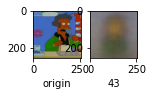

43it [00:00, 1343.79it/s]


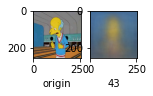

43it [00:00, 1323.07it/s]


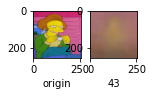

43it [00:00, 1457.63it/s]


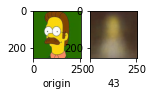

43it [00:00, 1482.78it/s]


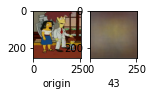

43it [00:00, 1457.64it/s]


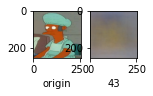

43it [00:00, 1482.79it/s]


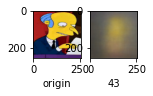

43it [00:00, 1409.82it/s]


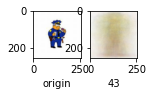

43it [00:00, 1365.07it/s]


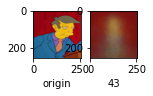

43it [00:00, 1563.65it/s]


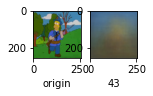

In [9]:
for i in range(10):
    fig=plt.figure(figsize=(10, 10))
    columns = 10
    rows = 1

    r = random.randint(0, len(trainX))

    fig.add_subplot(rows, columns, 1) 
    plt.imshow(trainX[r], cmap=plt.cm.binary) # image orginal
    plt.xlabel("origin")

    """fig.add_subplot(rows, columns, 2)
    plt.imshow(test1.simple_decode(test1.simple_encode(trainX[r])), cmap=plt.cm.binary)
    plt.xlabel(test1.nb_centroids)

    fig.add_subplot(rows, columns, 3)
    plt.imshow(test2.simple_decode(test2.simple_encode(trainX[r])), cmap=plt.cm.binary)
    plt.xlabel(test2.nb_centroids)

    fig.add_subplot(rows, columns, 4)
    plt.imshow(test3.simple_decode(test3.simple_encode(trainX[r])), cmap=plt.cm.binary)
    plt.xlabel(test3.nb_centroids)

    fig.add_subplot(rows, columns, 5)
    plt.imshow(test4.simple_decode(test4.simple_encode(trainX[r])), cmap=plt.cm.binary)
    plt.xlabel(test4.nb_centroids)
    
    fig.add_subplot(rows, columns, 6)
    plt.imshow(test5.simple_decode(test5.simple_encode(trainX[r])).squeeze(2), cmap=plt.cm.binary)
    plt.xlabel(test5.nb_centroids)

    fig.add_subplot(rows, columns, 7)
    plt.imshow(test6.simple_decode(test6.simple_encode(trainX[r])).squeeze(2), cmap=plt.cm.binary)
    plt.xlabel(test6.nb_centroids)

    fig.add_subplot(rows, columns, 8)
    plt.imshow(test7.simple_decode(test7.simple_encode(trainX[r])).squeeze(2), cmap=plt.cm.binary)
    plt.xlabel(test7.nb_centroids)

    fig.add_subplot(rows, columns, 9)
    plt.imshow(test8.simple_decode(test8.simple_encode(trainX[r])).squeeze(2), cmap=plt.cm.binary)
    plt.xlabel(test8.nb_centroids)

    fig.add_subplot(rows, columns, 10)
    plt.imshow(test9.simple_decode(test9.simple_encode(trainX[r])).squeeze(2), cmap=plt.cm.binary)
    plt.xlabel(test9.nb_centroids)

    fig.add_subplot(rows, columns, 11)
    plt.imshow(test10.simple_decode(test10.simple_encode(trainX[r])).squeeze(2), cmap=plt.cm.binary)
    plt.xlabel(test10.nb_centroids)

    fig.add_subplot(rows, columns, 12)
    plt.imshow(test11.simple_decode(test11.simple_encode(trainX[r])).squeeze(2), cmap=plt.cm.binary)
    plt.xlabel(test11.nb_centroids)"""

    fig.add_subplot(rows, columns, 2)
    plt.imshow(test12.simple_decode(test12.simple_encode(trainX[r])), cmap=plt.cm.binary)
    plt.xlabel(test12.nb_centroids)
    plt.show()
    """fig.add_subplot(rows, columns, 14)
    plt.imshow(test13.simple_decode(test13.simple_encode(trainX[r])).squeeze(2), cmap=plt.cm.binary)
    plt.xlabel(test13.nb_centroids)
    
    fig.add_subplot(rows, columns, 15)
    plt.imshow(test14.simple_decode(test14.simple_encode(trainX[r])).squeeze(2), cmap=plt.cm.binary)
    plt.xlabel(test14.nb_centroids)"""
    
    